In [1]:
#************************************************
#WARNING : RUN ON PYTHON3 OTHERWISE SOME MODULES MAY NOT LOAD (DEPRICATED)
#WARNING : RUN ON PYTHON3 OTHERWISE SOME MODULES MAY NOT LOAD (DEPRICATED)
#WARNING : RUN ON PYTHON3 OTHERWISE SOME MODULES MAY NOT LOAD (DEPRICATED)
#************************************************



import pandas as pd
import numpy as np
import random as rnd
 
# visualization
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# machine learning
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split, KFold,LeaveOneOut
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
#load the data file and study the data 
data = pd.read_csv("zoo.csv",sep=",")

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


## Comments on Data Info

(i) We have 101 data points. 

(ii) Most features are boolean

(iii) There is no presence of missing data ('NaN')

In [24]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## Comments on Data description

(i) Data seems very  clean. 


(ii) There is only one numerical data ("Legs") but it discontinuous

(iii) Multiclass problem

## Let's look into the Class files 




In [25]:
#load class files
#this file contains info about the number of species, specie examples
class_data = pd.read_csv("class.csv",sep=",")

In [26]:
class_data

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


## Bar plot of species

[<matplotlib.text.Text at 0x11117e710>, <matplotlib.text.Text at 0x111263128>]

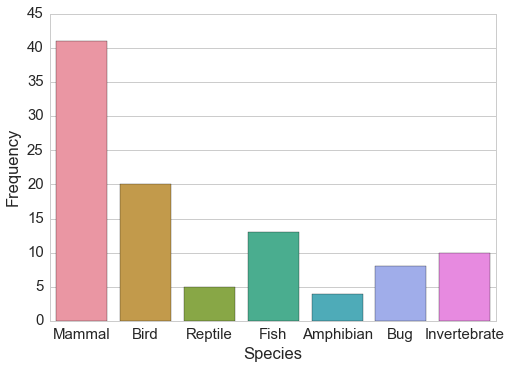

In [27]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

ax = sns.barplot(x="Class_Type", y="Number_Of_Animal_Species_In_Class", data=class_data)
ax.set(xlabel="Species",ylabel="Frequency")


## Let's count the fraction of each species with respect to whole data



In [28]:

animal_species_count = np.array(class_data.Number_Of_Animal_Species_In_Class)
species_names = class_data.Class_Type.astype(str)


In [29]:
nbr_total_species = animal_species_count.sum();
for idx,sp in enumerate(animal_species_count):
    frac = animal_species_count[idx] / nbr_total_species;
    #print(frac,nbr_total_species)
    print("******fraction of " + species_names[idx] + "s : " + str(animal_species_count[idx]/nbr_total_species*100) + " percent")

******fraction of Mammals : 40.5940594059 percent
******fraction of Birds : 19.801980198 percent
******fraction of Reptiles : 4.9504950495 percent
******fraction of Fishs : 12.8712871287 percent
******fraction of Amphibians : 3.9603960396 percent
******fraction of Bugs : 7.92079207921 percent
******fraction of Invertebrates : 9.90099009901 percent


## *Comments

(i) Notice the some species might be undersample. Given that we are tackling a multiclass classification challenge, undersampling might be an issue later on during model approach,training and cross-validation stages.

(ii) For example amphibians are undersample and the might excluded from cross-validation stages

In [30]:
data.drop('animal_name',axis=1,inplace=True)

In [31]:
X_train = data.drop('class_type',axis = 1)
Y_train = data.class_type

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


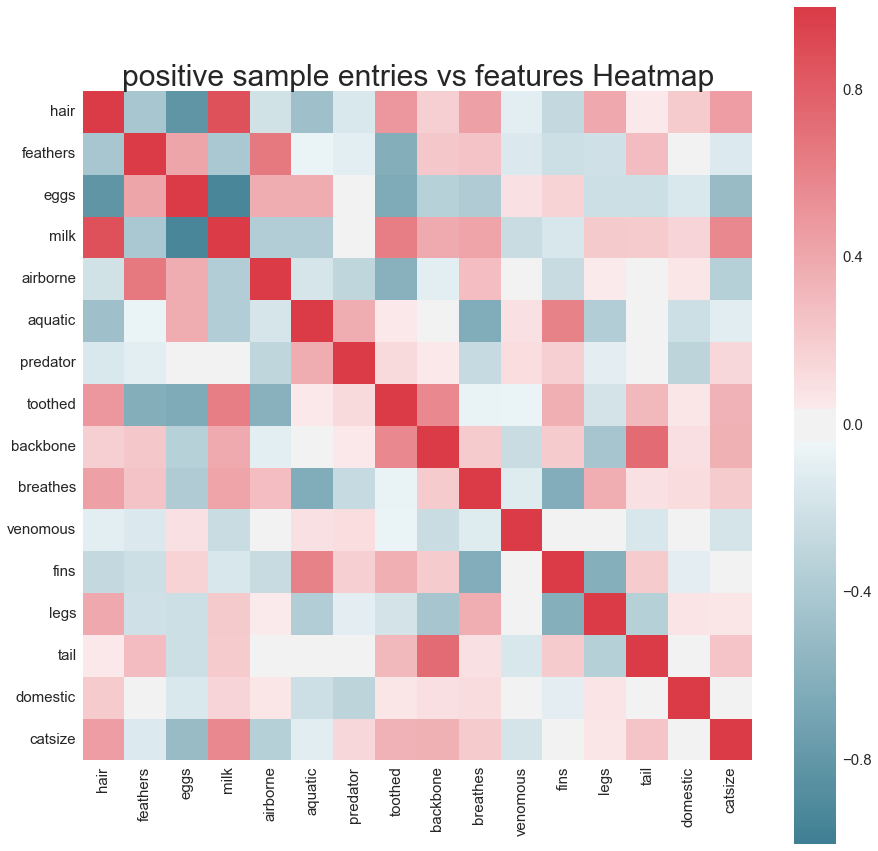

In [55]:
f, ax = plt.subplots(figsize=(15,15))

ax.set_title('positive sample entries vs features Heatmap')
corr = X_train.corr()
ax.title.set_fontsize(30)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

## *Comment on Correlation of features

(i) There are some interesting correlations and anticorrelations like "milk"-"hair", "tail"-"backbones", "eggs-hair".
I suspect this features coubples are good predictors for some species.

In [14]:
size = len(data.eggs)
data['Frequency_Plots'] =pd.Series(np.ones(size,dtype=np.int16), index=data.index)

In [15]:
len(data.columns)

18

In [32]:
#map hash between categorical species data and species type

mapper_species_categorical = {1:'Mammal',2:'Bird',3:'Reptile',4:'Fish',5:'Amphibian',6:'Bug',7:'Invertebrate'}

In [33]:
#Create new colum with the species type
#loop through the categorical data  and perform mapping
#Get categorical (species) data
sp_list  = list(data.class_type.astype(int))
tmp_species_list =[] # buffer list to storewith specie name

#start the loop through categorical dat
for idx,_sp in enumerate(sp_list):
    #get specie name
    a = mapper_species_categorical[_sp]
    #append to buffer list
    tmp_species_list.append(a)




In [34]:
#Use buffer list to create the class_name class
data['class_name'] = pd.Series(tmp_species_list, index=data.index)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


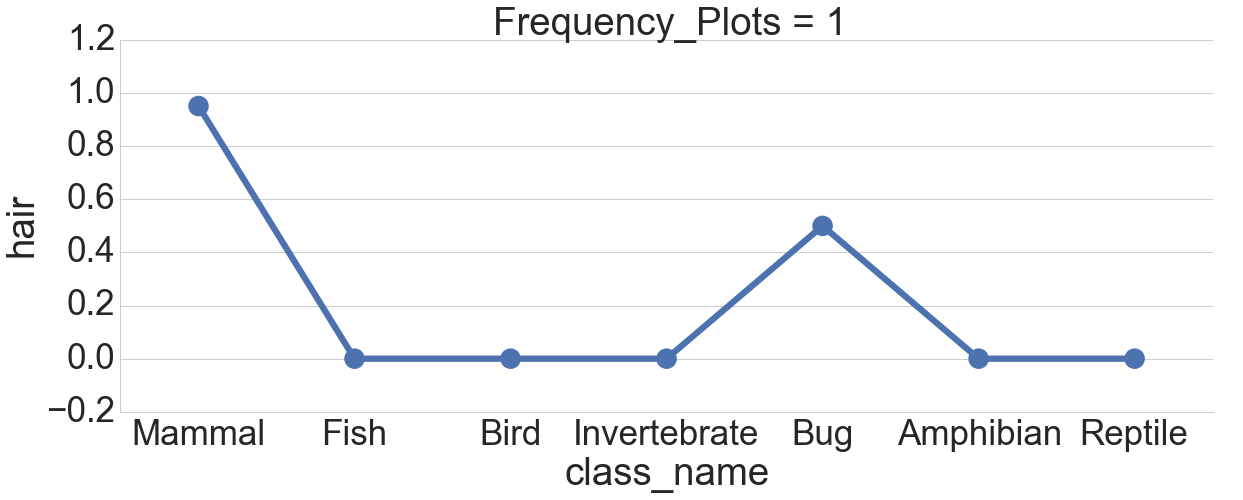

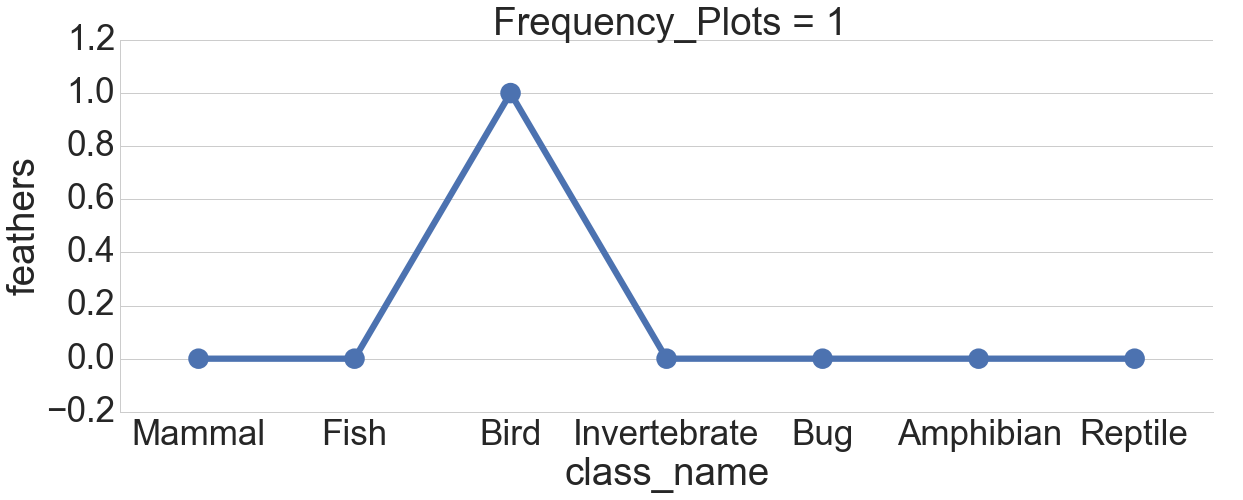

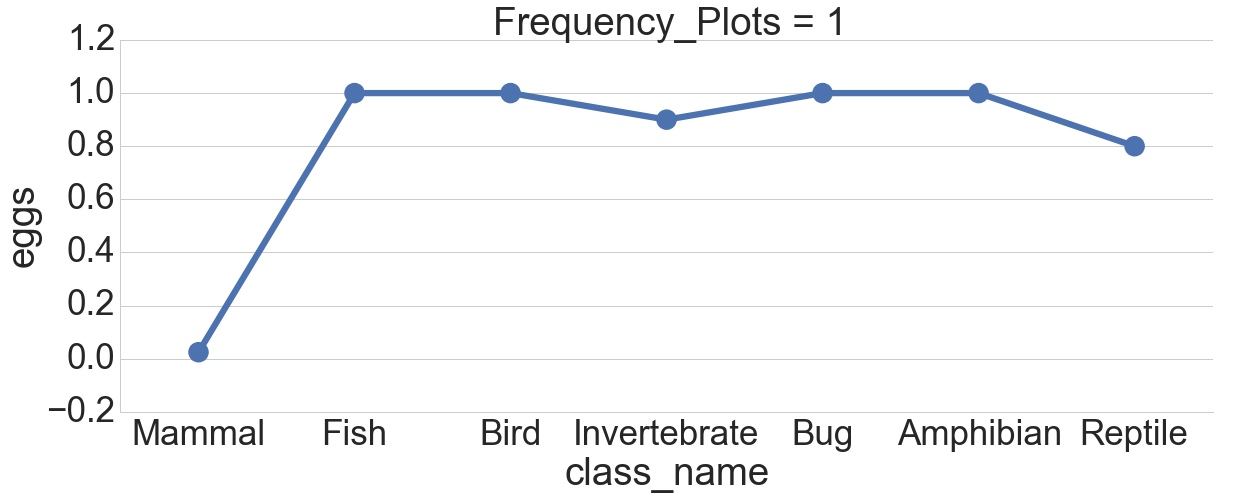

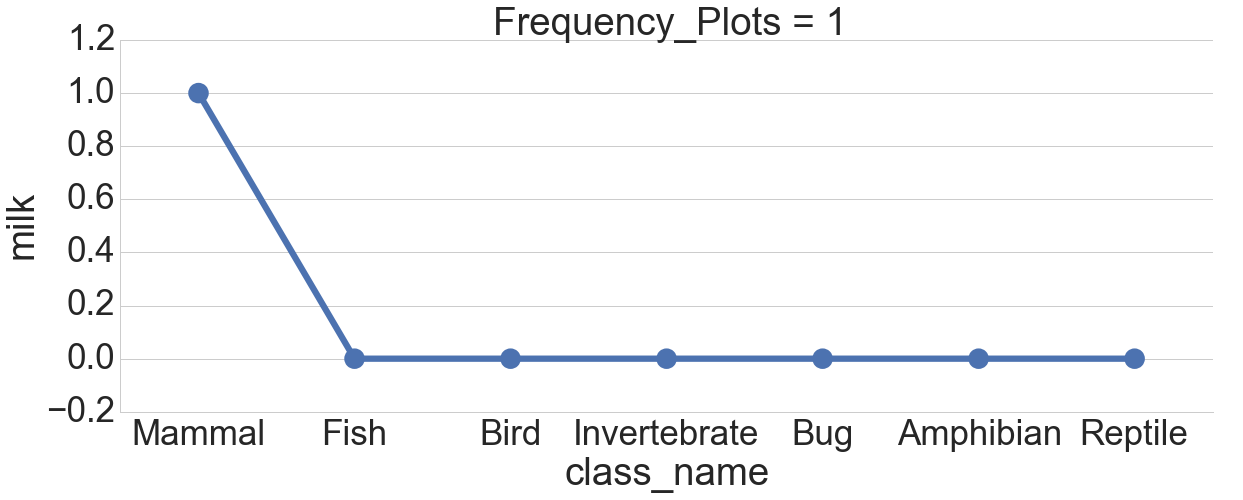

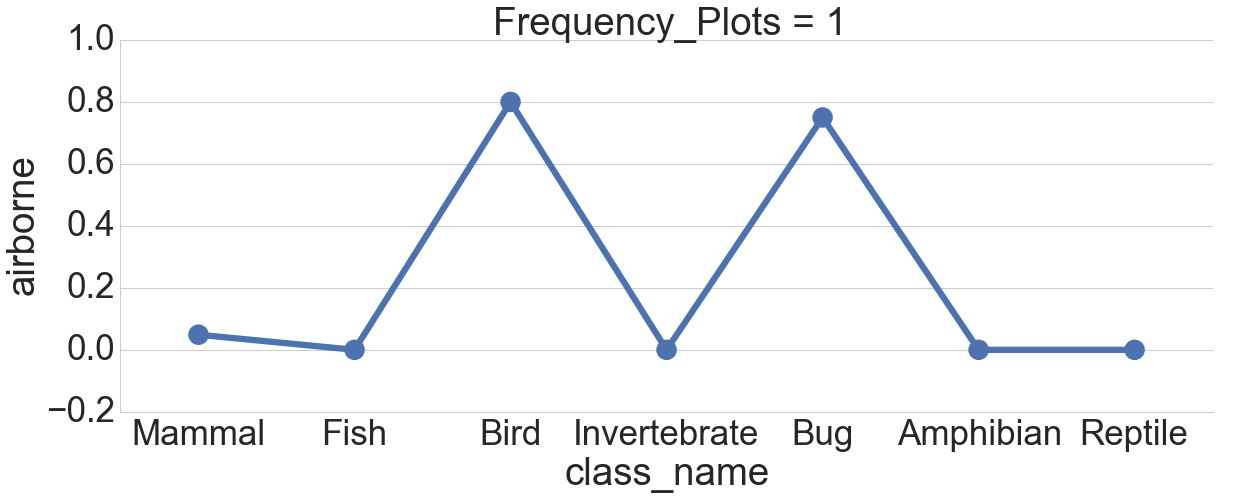

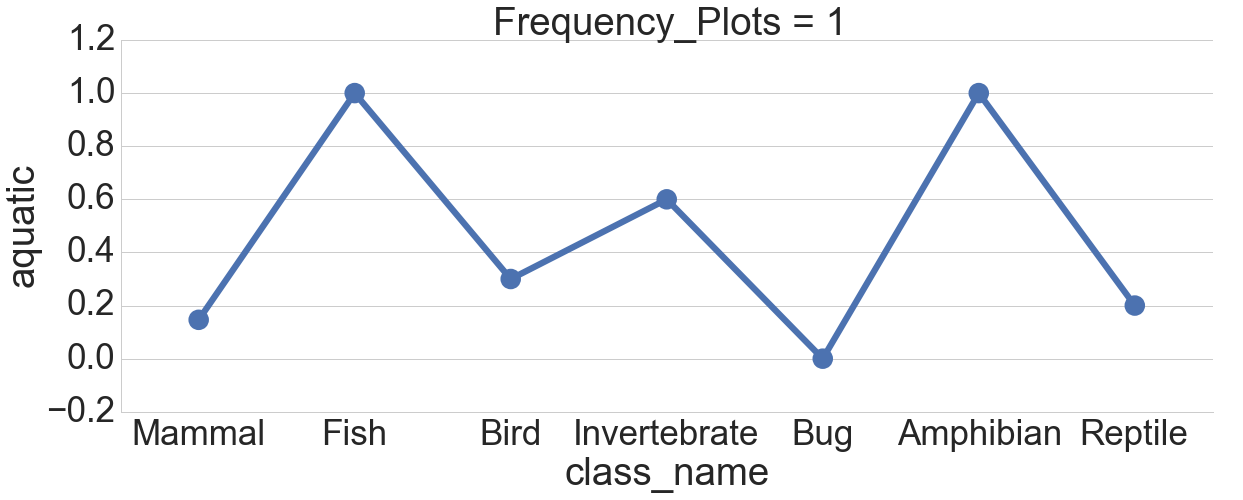

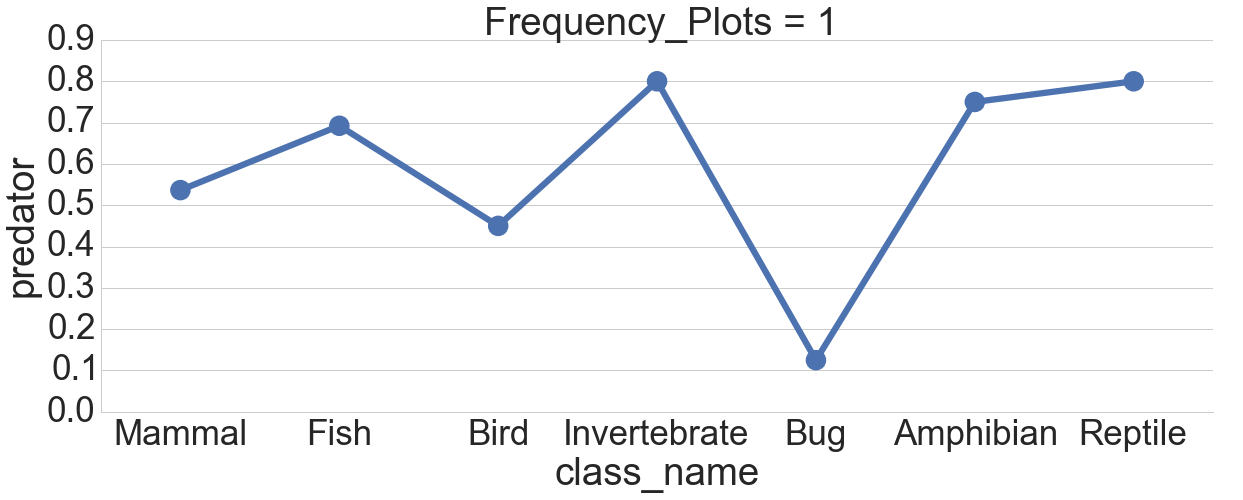

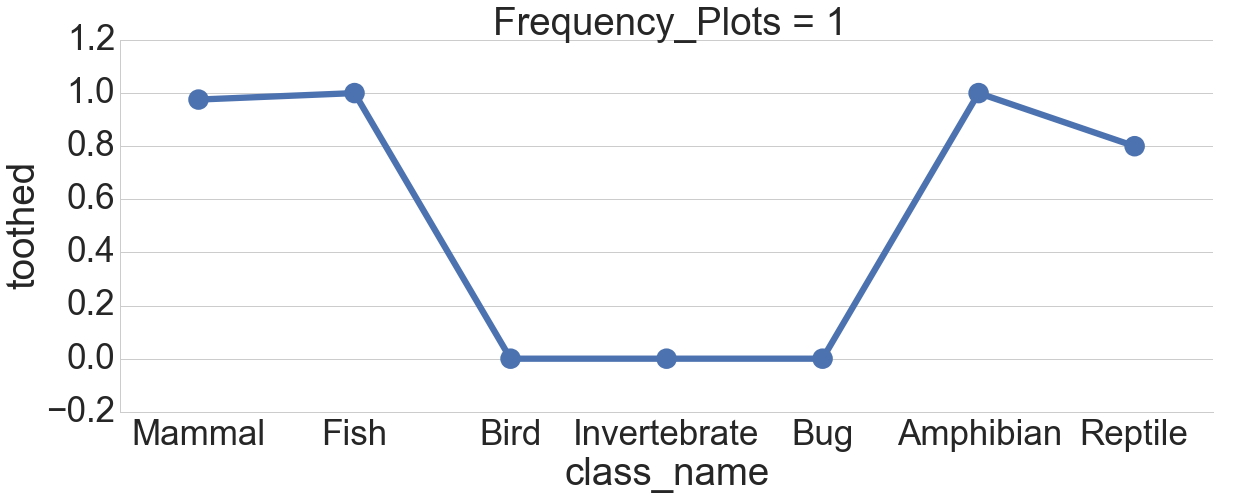

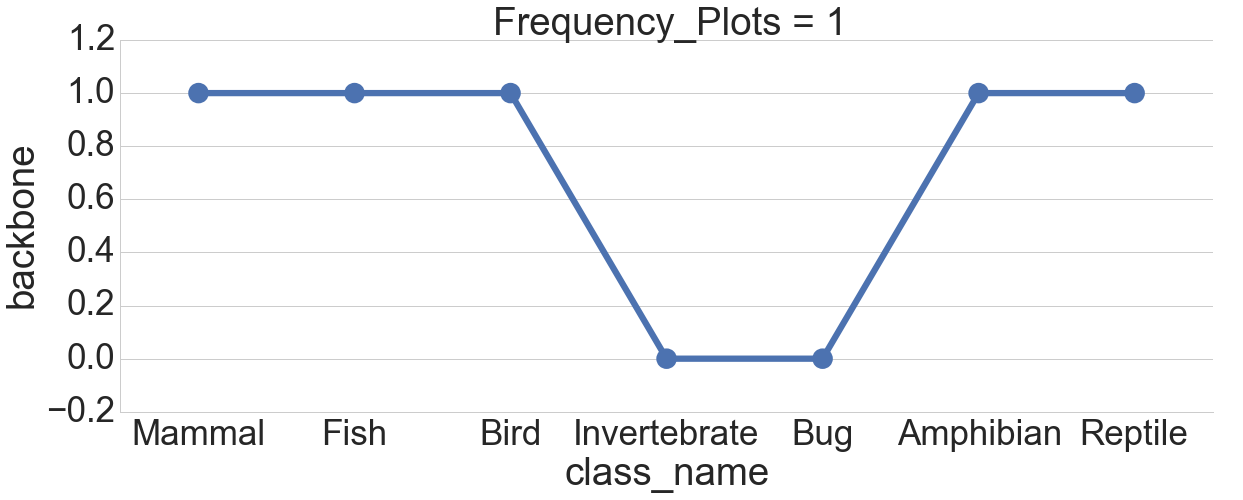

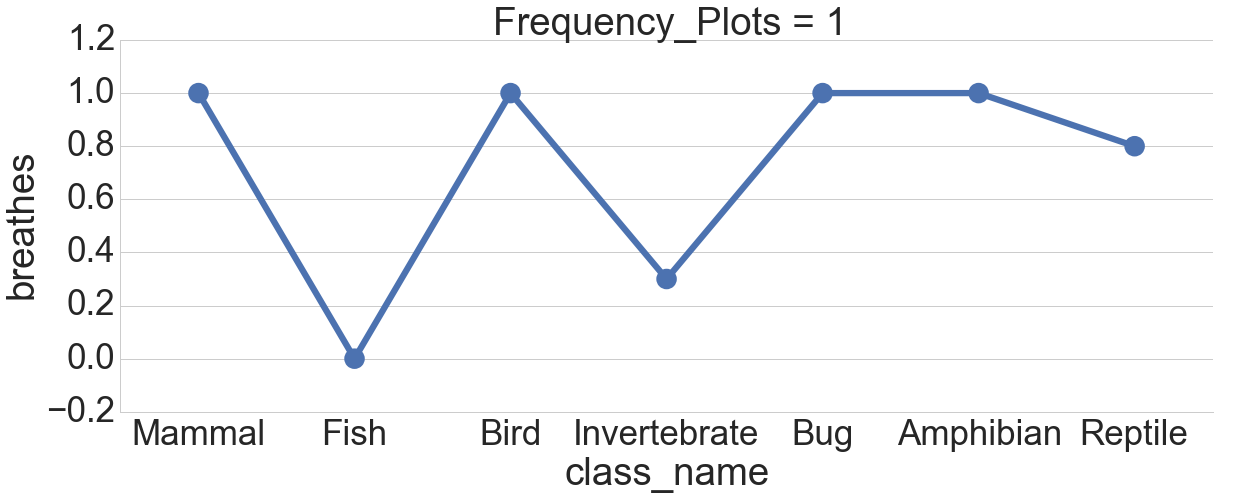

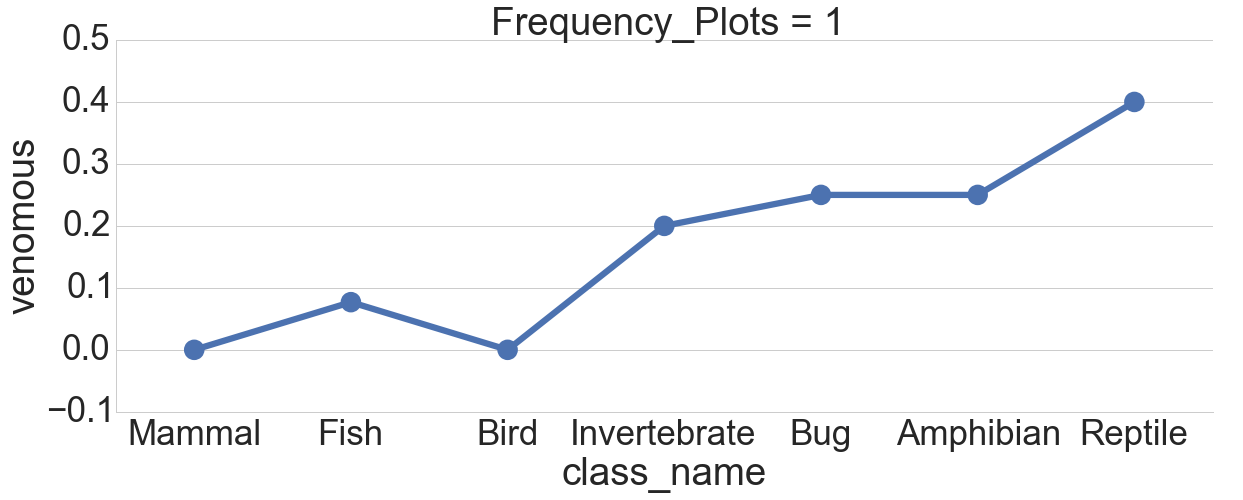

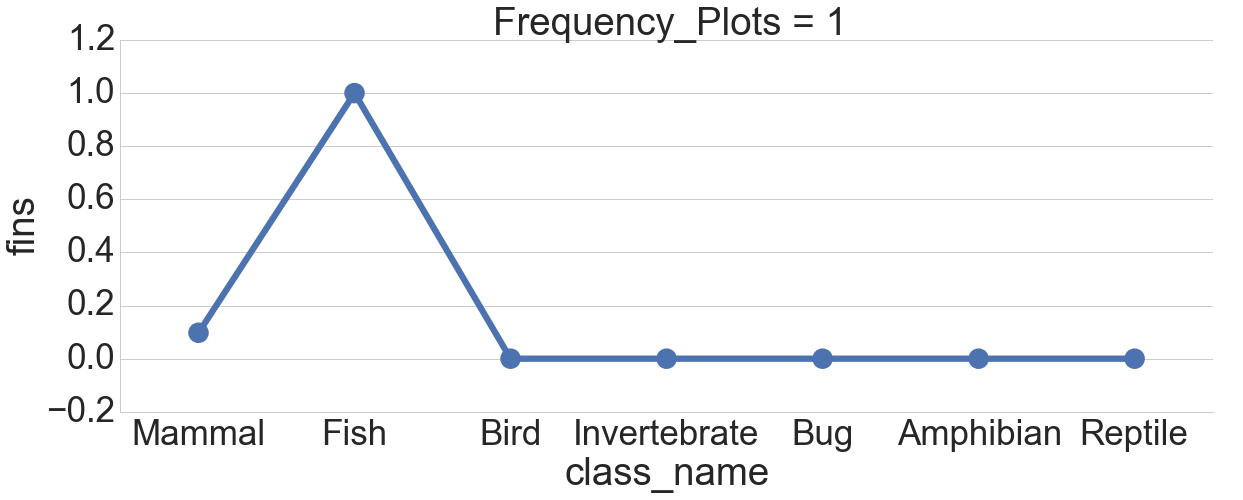

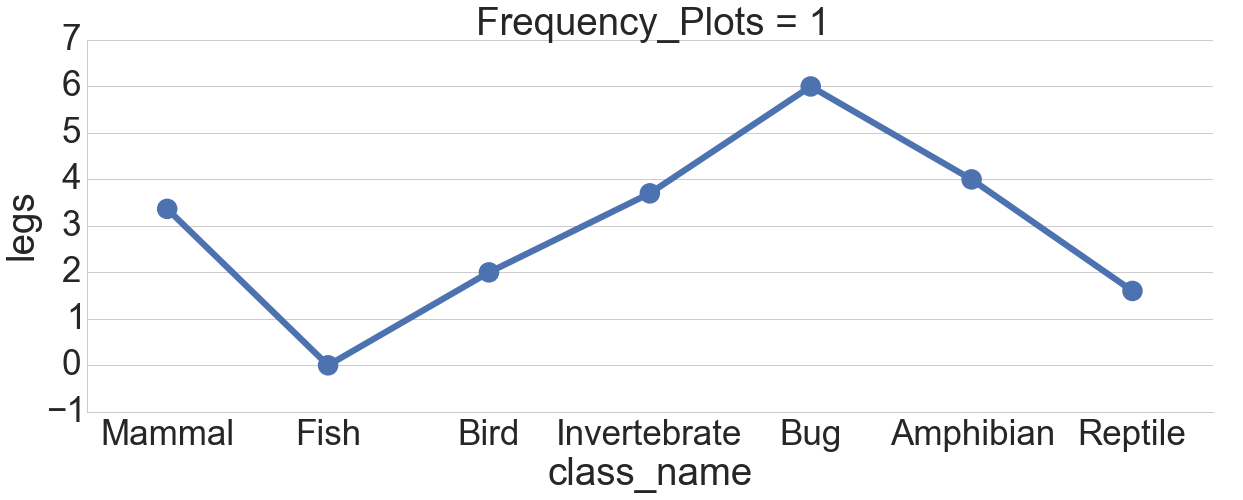

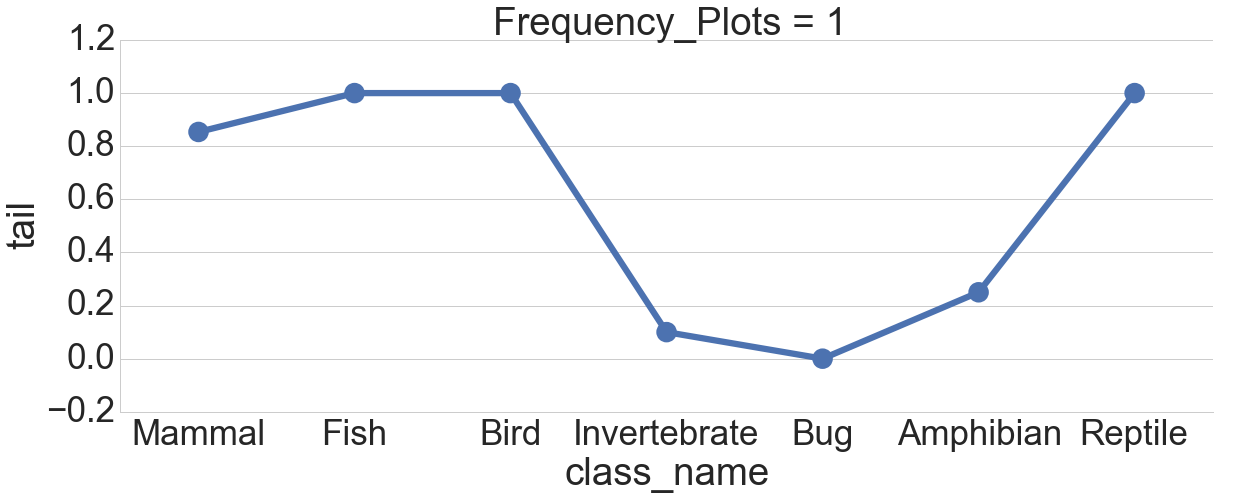

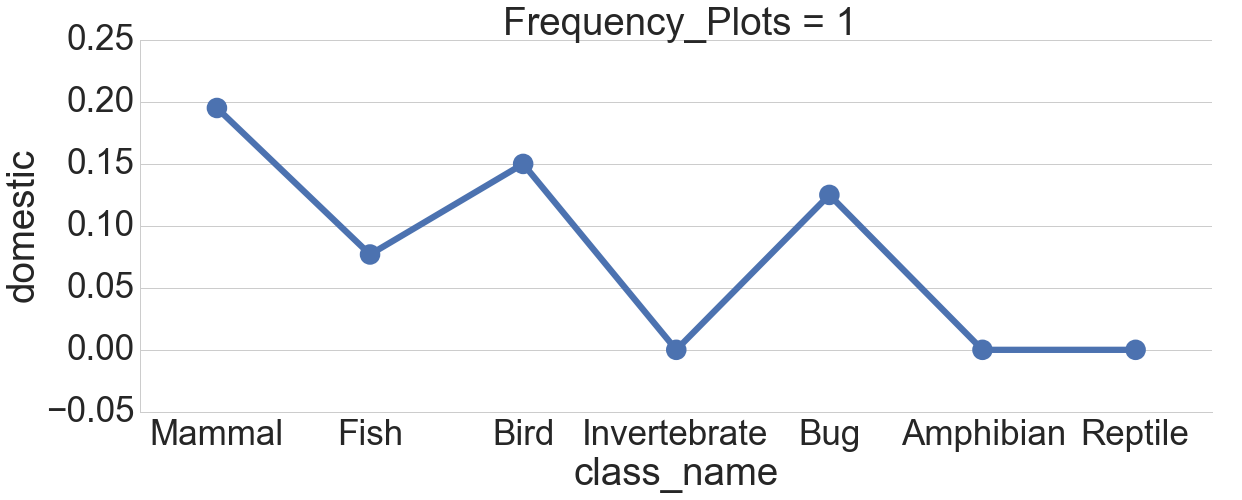

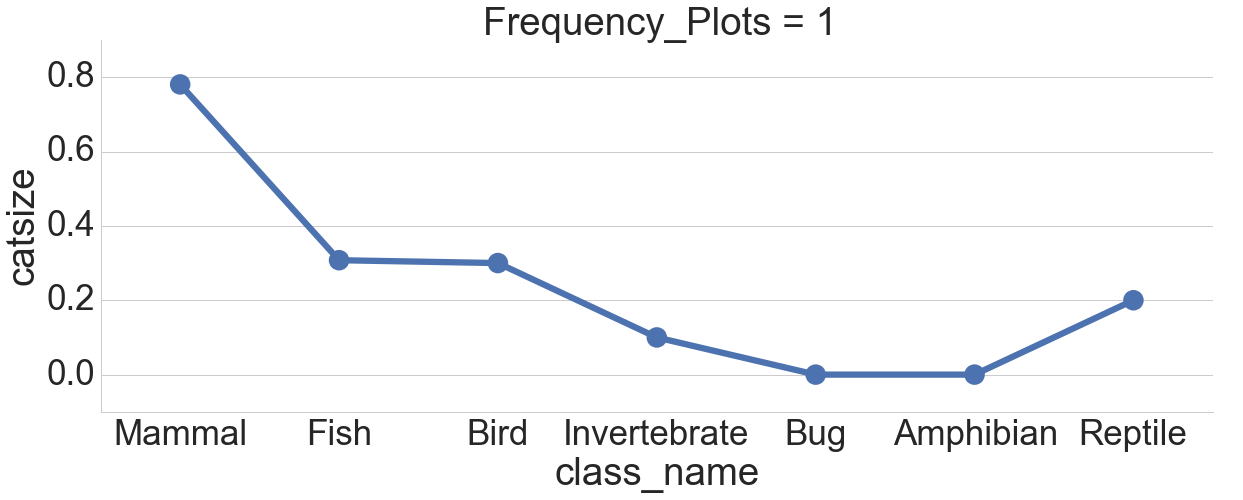

In [19]:
#Countplot of species depending of features
sns.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 3.5})


for idx,row_name in enumerate(data.columns[:16 ]):
    
    grid = sns.FacetGrid(data, row='Frequency_Plots',size=8,aspect=2.2)
    grid.map(sns.pointplot,'class_name',row_name,alpha=0.5 , ci=None)
    grid.add_legend()
    grid.savefig("out_" + str(row_name) + ".png")


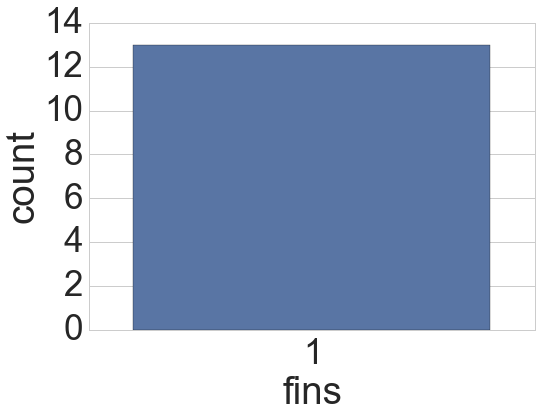

In [140]:
#Countplot of species depending of features
sns.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 3.5})

data_fish = data[data.class_type == 4]
data_fish_rest = data[data.class_type != 4]

#data_mammal
ax = sns.countplot(x="fins", data=data_fish)

#grid.savefig("out_" + str(row_name) + ".png")

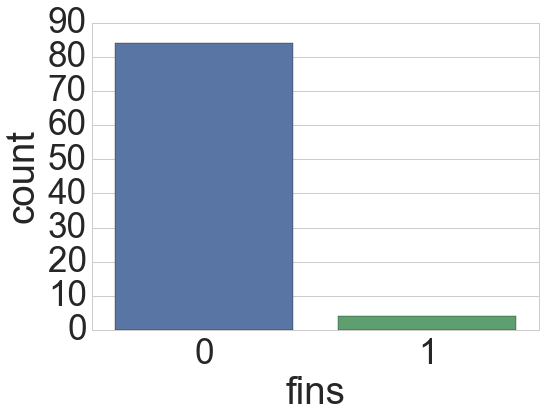

In [141]:
#Countplot of species depending of features
sns.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 3.5})

data_fish = data[data.class_type== 4]
data_fish_rest = data[data.class_type != 4]

#data_mammal
ax = sns.countplot(x="fins", data=data_fish_rest)

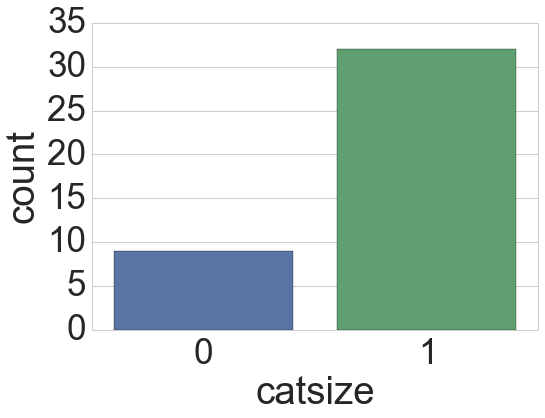

In [146]:
data_mammal = data[data.class_type== 1]
data_mammal_rest = data[data.class_type != 1]
ax = sns.countplot(x="catsize", data=data_mammal)

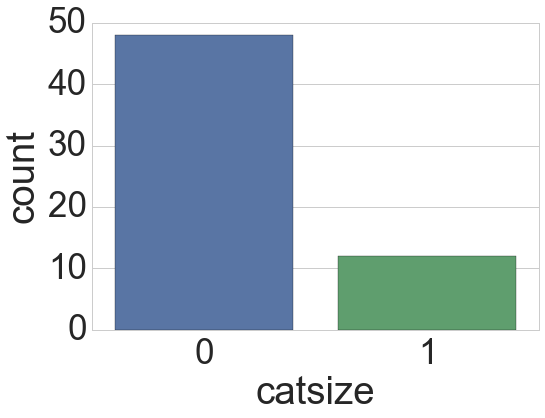

In [147]:
ax = sns.countplot(x="catsize", data=data_mammal_rest)

## ***********Features Importance: Chi-Square Statistics*************************

Uses chi-square statistics testing per features to rank them based on p-values



In [52]:
#Select Features based on Values

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Calculate scores, and p-values
Chi2Selector=SelectKBest(chi2, k=15)

scores,pvalues = Chi2Selector.score_func(X_train,Y_train)

#plot the scores and p-values

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Scores"] = pd.Series(scores)
coeff_df["Pvalues"] = pd.Series(pvalues)
coeff_df.sort_values(by='Scores', ascending=False)


,Feature,Scores,Pvalues
12,legs,81.170621,2.047031e-15
1,feathers,81.000000,2.220198e-15
11,fins,62.553802,1.360770e-11
3,milk,60.000000,4.501017e-11
4,airborne,49.214736,6.753324e-09
0,hair,48.833806,8.049349e-09
2,eggs,37.419719,1.458360e-06
7,toothed,37.060056,1.714052e-06
5,aquatic,29.868970,4.162830e-05
15,catsize,20.976006,1.852915e-03




## ***********Create One-vs-All datasets*************************

In [35]:
#create One vs All data frames
#Split data per Species

#list to keep data sets for rest-vs.All 
Y_train_OvA_list = [];

for i in range(1,8):
    OvA= data.copy()
    OvA.class_type = OvA.class_type.apply(lambda x: 1 if x==i else 0)
    Y_train_OvA_list.append(OvA.class_type)
   



In [36]:
#necesary Mapper from specie to categorical data
mapper_categorical_to_species = {'Mammal':1,'Bird':2,'Reptile':3,'Fish':4,'Amphibian':5,'Bug':5,'Invertebrate':7}

In [37]:
# Functions to obtained scores
#These functions calculate the scores for a given classification algorithm 
#multiple scores are createing for statistics

def scores(clf, train_set, random_state, folds, target):
    #stratified K-fold
    skf = StratifiedKFold(n_splits = folds, shuffle = False, random_state = random_state)
    list_clf_scores = []
    list_clf_train_scores = []
    
    for train, test in skf.split(train_set,target):
        #get training and testing sets for features 
        _Xtrain, _Xtest = train_set[train], train_set[test]
        _Ytrain, _Ytest = target[train], target[test]
        #create clasifier
        clf.fit(_Xtrain, _Ytrain.ravel())
        #test prediction for training cv sets
        #
        pred = pd.DataFrame(clf.predict(_Xtest)) 
        #a must to avoid overfitting
        
        pred_train = pd.DataFrame(clf.predict(_Xtrain)) 
        list_clf_scores.append(metrics.accuracy_score(_Ytest,pred))
        list_clf_train_scores.append(metrics.accuracy_score(_Ytrain,pred_train))
    return list_clf_scores,list_clf_train_scores

#Encapsulate scores functions
def get_scores(clf,nbr_seed,listout_scores,listout_train_scores,printout,target_Y):
    #make sure to get training values to avoid overfitting
    
    list_scores= []
    list_train_scores = []
    for i in range(nbr_seed):
        #for the different number of seeds get scores 
        list_scores,list_train_scores = scores(clf,np.array(X_train),random_state = i, folds = 4, target = target_Y )
        listout_scores.append(list_scores)
        listout_train_scores.append(list_train_scores)
    print(printout) 
    #return scores for training and testing
    return listout_scores,listout_train_scores


## ***********Let's test some Classification Algorithms*************************

## ***********Random Forest (Not Tuned)*************************

In [157]:
#Random Forrest stratified k-fold testing

rf_clf = RandomForestClassifier(n_estimators=3,n_jobs=-1,max_features=4,max_depth=4 )
list_rf_scores = []
list_rf_train_scores = []
list_rf_scores,list_rf_train_scores = get_scores(rf_clf,10,list_rf_scores,list_rf_train_scores,"Random Forrest scores completed",Y_train)

Random Forrest scores completed


In [200]:
print('score ' + str(np.mean(list_rf_scores)))

score 0.978141987179


In [29]:
#Extremely Random Forrest stratified k-fold testing
extratrees_clf = ExtraTreesClassifier(n_estimators=200,n_jobs=-1)
list_extratrees_scores = []
list_extratrees_train_scores = []
list_extratrees_scores ,list_extratrees_train_scores= get_scores(extratrees_clf,10,list_extratrees_scores,list_extratrees_train_scores,"Extra Trees scores completed",Y_train)

Extra Trees scores completed


## *********** KNN (Not Tuned)*************************

In [38]:
knn_clf= KNeighborsClassifier(n_neighbors=3)
list_knn_scores = []
list_knn_train_scores =[]
list_knn_scores,list_knn_train_scores = get_scores(knn_clf,10,list_knn_scores,list_knn_train_scores,"KNN scores completed",Y_train)

KNN scores completed


In [201]:
print('score ' + str(np.mean(list_knn_scores)))

score 0.922380952381


## ***********Check Overfitting *************************

In [202]:
list_models = ["Random Forest", "KNN"]
list_models_scores=[np.mean(list_rf_scores),np.mean(list_rf_scores),np.mean(list_knn_scores)]
list_models_train_scores=[np.mean(list_rf_train_scores),np.mean(list_knn_train_scores)]

In [203]:
print(list_models_train_scores)

[0.98713155616313519, 0.9735847245760727]


## *********** One vs. Rest (Random Forest)*************************

In [34]:
AoV_score_list=[]
Aov_scores_train_list = []
for idx in range(0,7):
    target_specie = mapper_species_categorical[idx+1]
    #print("training AvO for species: " + target_specie)
    ytr = Y_train_OvA_list [idx];
    extratrees_clf = RandomForestClassifier(n_estimators=3,n_jobs=-1,max_features=4,max_depth=4)
    list_extratrees_scores = []
    list_extratrees_train_scores = []
    list_extratrees_scores,list_extratrees_train_scores = get_scores(extratrees_clf,10,list_extratrees_scores,list_extratrees_train_scores,"Extra Trees scores completed for " + target_specie ,ytr )
    print("mean accuracy score for "  + target_specie + ": "  + str(np.mean(list_extratrees_scores)))
    print("mean accuracy training scores for "  + target_specie + ": "  + str(np.mean(list_extratrees_train_scores)))
    AoV_score_list.append(np.mean(list_extratrees_scores))
    AoV_score_list.append(np.mean(list_extratrees_train_scores))
print(list_extratrees_scores)
print(np.mean(list_extratrees_scores))

Extra Trees scores completed for Mammal
mean accuracy score for Mammal: 0.989038461538
mean accuracy training scores for Mammal: 0.998013157895
Extra Trees scores completed for Bird
mean accuracy score for Bird: 0.983
mean accuracy training scores for Bird: 0.996048245614
Extra Trees scores completed for Reptile
mean accuracy score for Reptile: 0.951615384615
mean accuracy training scores for Reptile: 0.973907894737
Extra Trees scores completed for Fish
mean accuracy score for Fish: 0.992115384615
mean accuracy training scores for Fish: 0.996701754386
Extra Trees scores completed for Amphibian
mean accuracy score for Amphibian: 0.976115384615
mean accuracy training scores for Amphibian: 0.99075877193
Extra Trees scores completed for Bug
mean accuracy score for Bug: 0.982192307692
mean accuracy training scores for Bug: 0.993390350877
Extra Trees scores completed for Invertebrate
mean accuracy score for Invertebrate: 0.973522435897
mean accuracy training scores for Invertebrate: 0.986784

## *********** One vs. Rest (KNN)*************************

In [35]:
AoV_score_knn_list=[]
Aov_scores_knn_train_list = []
for idx in range(0,7):
    target_specie = mapper_species_categorical[idx+1]
    #print("training AvO for species: " + target_specie)
    ytr = Y_train_OvA_list [idx];
    knn_clf = KNeighborsClassifier(n_neighbors=3)
    list_extratrees_scores = []
    list_extratrees_train_scores = []
    list_extratrees_scores,list_extratrees_train_scores = get_scores(extratrees_clf,10,list_extratrees_scores,list_extratrees_train_scores,"Extra Trees scores completed for " + target_specie,ytr  )
    print("mean accuracy score for "  + target_specie + ": "  + str(np.mean(list_extratrees_scores)))
    print("mean accuracy training scores for "  + target_specie + ": "  + str(np.mean(list_extratrees_train_scores)))
    AoV_score_list.append(np.mean(list_extratrees_scores))
    AoV_score_list.append(np.mean(list_extratrees_train_scores))

Extra Trees scores completed for Mammal
mean accuracy score for Mammal: 0.988076923077
mean accuracy training scores for Mammal: 0.997355263158
Extra Trees scores completed for Bird
mean accuracy score for Bird: 0.992
mean accuracy training scores for Bird: 0.998684210526
Extra Trees scores completed for Reptile
mean accuracy score for Reptile: 0.948576923077
mean accuracy training scores for Reptile: 0.969320175439
Extra Trees scores completed for Fish
mean accuracy score for Fish: 0.983038461538
mean accuracy training scores for Fish: 0.997364035088
Extra Trees scores completed for Amphibian
mean accuracy score for Amphibian: 0.972192307692
mean accuracy training scores for Amphibian: 0.985789473684
Extra Trees scores completed for Bug
mean accuracy score for Bug: 0.979269230769
mean accuracy training scores for Bug: 0.993377192982
Extra Trees scores completed for Invertebrate
mean accuracy score for Invertebrate: 0.971166666667
mean accuracy training scores for Invertebrate: 0.98516

## Values for Rest. vs. All look promising, possibly better Multiclassification

##  Hyperdimensional Tuning : Random Forest + PCA

In [38]:
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', RandomForestClassifier())
])

N_FEATURES_OPTIONS = [10]
N_ESTIMATORS = [2,3,4,5,6]
MAX_FEATURES = [2,3,4,5]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__n_estimators': N_ESTIMATORS,
        'classify__max_features': MAX_FEATURES
    },    
]

grid_PCA = GridSearchCV(pipe, cv=4, n_jobs=1, param_grid=param_grid,return_train_score=True)

##  Get Mean score for Hyperdimensional Tuning : Random Forest + PCA

In [39]:
grid_PCA.fit(X_train, Y_train)

mean_test_scores =np.array(grid_PCA.cv_results_['mean_test_score'])
print(mean_test_scores)
print(np.mean(mean_test_scores))

[ 0.79207921  0.83168317  0.88118812  0.87128713  0.89108911  0.82178218
  0.87128713  0.89108911  0.86138614  0.92079208  0.81188119  0.85148515
  0.9009901   0.91089109  0.93069307  0.87128713  0.85148515  0.91089109
  0.93069307  0.92079208]
0.876237623762


##  Hyperdimensional Tuning : Random Forest  NO PCA

In [123]:
pipe = Pipeline([
    ('reduce_dim', SelectKBest()),
    ('classify', RandomForestClassifier())
])


N_FEATURES_K = [16]
N_ESTIMATORS = [2,3,4,5,6]
MAX_FEATURES = [2,3,4,15]
param_grid = [
    
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_K,
        'classify__n_estimators': N_ESTIMATORS,
        'classify__max_features': MAX_FEATURES
    },
]

grid_Chi2 = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid,return_train_score=True)

##  Check if Overfit

In [124]:
grid_Chi2.fit(X_train, Y_train)

mean_test_scores =np.array(grid_Chi2.cv_results_['mean_train_score'])
print(mean_test_scores)
print(np.mean(mean_test_scores))

[ 0.92537532  0.984375    0.97470504  0.98460821  0.99009683  0.96480187
  0.97545175  1.          0.98958333  0.98958333  0.97498533  0.99009683
  0.98460821  0.99530516  0.98460821  0.97652582  0.98070716  0.98958333
  0.99530516  1.        ]
0.982515295442


##  Get Mean score for Hyperdimensional Tuning : Random Forest + PCA

In [42]:
np.mean(mean_test_scores)

0.96843418252049618

##  PCA is not good approach! Initial Traits are better predictors

In [43]:
grid_Chi2.fit(X_train, Y_train)

mean_test_scores =np.array(grid_Chi2.cv_results_['mean_train_score'])
mean_test_scores

array([ 0.95954646,  0.98037979,  0.9800995 ,  0.9655015 ,  0.98037979,
        0.95010971,  0.97517146,  0.9655015 ,  0.97568496,  0.97047662,
        0.93161065,  0.96080666,  0.98507463,  0.98507463,  0.97568496,
        0.94700244,  0.98037979,  0.95039   ,  0.96996312,  0.97042954])

In [44]:
mean_test_scores =np.array(grid_Chi2.cv_results_['mean_test_score'])
mean_test_scores

array([ 0.92079208,  0.91089109,  0.92079208,  0.92079208,  0.92079208,
        0.89108911,  0.93069307,  0.93069307,  0.92079208,  0.93069307,
        0.9009901 ,  0.89108911,  0.92079208,  0.95049505,  0.91089109,
        0.89108911,  0.95049505,  0.92079208,  0.96039604,  0.95049505])

##  Let's Check KNN 

In [42]:
pipe = Pipeline([
    ('reduce_dim', SelectKBest()),
    ('classify', KNeighborsClassifier())
])


N_FEATURES_K = [10]
MAX_FEATURES = [2,3,4]
N_K=[1,2,3,4,5,6]
param_grid = [
    
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_K,
        'classify__n_neighbors': N_K,
        
    },
]

grid_knn = GridSearchCV(pipe, cv=4, n_jobs=1, param_grid=param_grid,return_train_score=True,refit=True)

In [43]:
grid_knn.fit(X_train, Y_train)
mean_test_scores =np.array(grid_knn.cv_results_['mean_test_score'])
mean_test_scores[0]

0.96039603960396036

In [44]:
mean_test_scores

array([ 0.96039604,  0.96039604,  0.92079208,  0.88118812,  0.85148515,
        0.85148515])

## Diagnostic for KNN

[None]

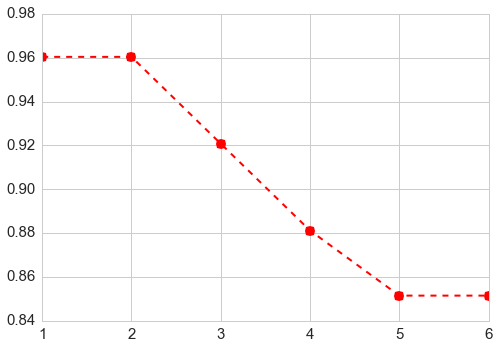

In [54]:
N_K=[1,2,3,4,5,6];
p1=plt.plot(N_K,mean_test_scores,'r--')
plt.hold(True)
p2=plt.plot(N_K,mean_test_scores,'ro',)
plt.setp(p1, 'linewidth', 2.0)
plt.setp(p2, 'ms', 10.0)

##  Not much better than Random Forest

##  ***************One vs. Rest*************** 

In [181]:
best_estimator={}
AvO_scores_chi_2 = []
std_AvO_scores_chi_2 = []
for idx in range(0,7):
    target_specie = mapper_species_categorical[idx+1]
    print("training All vs. One for species: " + target_specie)
    ytr = Y_train_OvA_list [idx];
    
    pipe = Pipeline([
    ('reduce_dim', SelectKBest()),
    ('classify', RandomForestClassifier())
    ])


    N_FEATURES_K = [16]
    N_ESTIMATORS = [2,3,4,15]
    MAX_FEATURES = [2,3,4,16]
    param_grid = [
    
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_K,
        'classify__n_estimators': N_ESTIMATORS,
        'classify__max_features': MAX_FEATURES
    },
    ]

    grid_Chi2 = GridSearchCV(pipe, cv=5, n_jobs=1, param_grid=param_grid,return_train_score=True,refit=True)
    grid_Chi2.fit(X_train, ytr)
    clf = grid_Chi2.best_estimator_
    best_estimator[target_specie] = clf
    list_rf_scores = []
    list_rf_train_scores = []
    list_rf_scores,list_rf_train_scores = get_scores(clf,100,list_rf_scores,list_rf_train_scores,"Random Forrest scores completed",ytr)
    print("test score : " + str(np.mean(list_rf_scores)))
    print("training score : " + str(np.mean(list_rf_train_scores)))
    
    size= len(list_rf_scores)
    AvO_scores_chi_2.append(np.mean(list_rf_scores))
    std_AvO_scores_chi_2.append(np.std(list_rf_scores)/size**0.5 * 0.5) 

training All vs. One for species: Mammal
Random Forrest scores completed
test score : 0.9943
training score : 1.0
training All vs. One for species: Bird
Random Forrest scores completed
test score : 0.984346153846
training score : 0.993989035088
training All vs. One for species: Reptile
Random Forrest scores completed
test score : 0.961915384615
training score : 0.997889035088
training All vs. One for species: Fish
Random Forrest scores completed
test score : 0.991
training score : 0.995677631579
training All vs. One for species: Amphibian
Random Forrest scores completed
test score : 0.9879
training score : 0.999768859649
training All vs. One for species: Bug
Random Forrest scores completed
test score : 0.979769230769
training score : 0.997521929825
training All vs. One for species: Invertebrate
Random Forrest scores completed
test score : 0.978171794872
training score : 0.99417521645


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


##  One Vs. Rest shows better scores: this is the strategy to go

##  Feature Importance per specie:

In [182]:
for idx,keys in enumerate(best_estimator.keys()):
    print(keys)
    ytr = Y_train_OvA_list [idx];
    chi_scores,chi_score_p_values = best_estimator[keys].named_steps['reduce_dim'].score_func(X_train,ytr)
    b_clf_importances = best_estimator[keys].named_steps['classify'].feature_importances_
    coeff_df = pd.DataFrame(X_train.columns[:])
    coeff_df.columns = ['Feature']
    coeff_df["Scores"] = pd.Series(b_clf_importances)
    print(coeff_df.sort_values(by='Scores', ascending=False)[:3])

    #coeff_df["Pvalues"] = pd.Series(pvalues)
    #coeff_df.sort_values(by='Scores', ascending=False)
#b_clf = best_estimator['Amphibian'].named_steps['classify'].feature_importances_
#best_estimator['Amphibian'].named_steps['reduce_dim'].score_func(X_train,Y_train)
    

Amphibian
    Feature    Scores
7   toothed  0.191879
12     legs  0.142635
2      eggs  0.097161
Invertebrate
     Feature    Scores
9   breathes  0.484334
11      fins  0.158476
12      legs  0.090941
Fish
    Feature    Scores
5   aquatic  0.316355
3      milk  0.263589
13     tail  0.150359
Bird
    Feature    Scores
1  feathers  0.641923
5   aquatic  0.176609
3      milk  0.155581
Mammal
   Feature    Scores
3     milk  0.302549
0     hair  0.168102
12    legs  0.122946
Reptile
     Feature    Scores
10  venomous  0.228396
12      legs  0.144663
5    aquatic  0.091141
Bug
     Feature    Scores
8   backbone  0.233923
12      legs  0.169393
5    aquatic  0.154388


##  Plots of  Performances

(1, 7.5)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


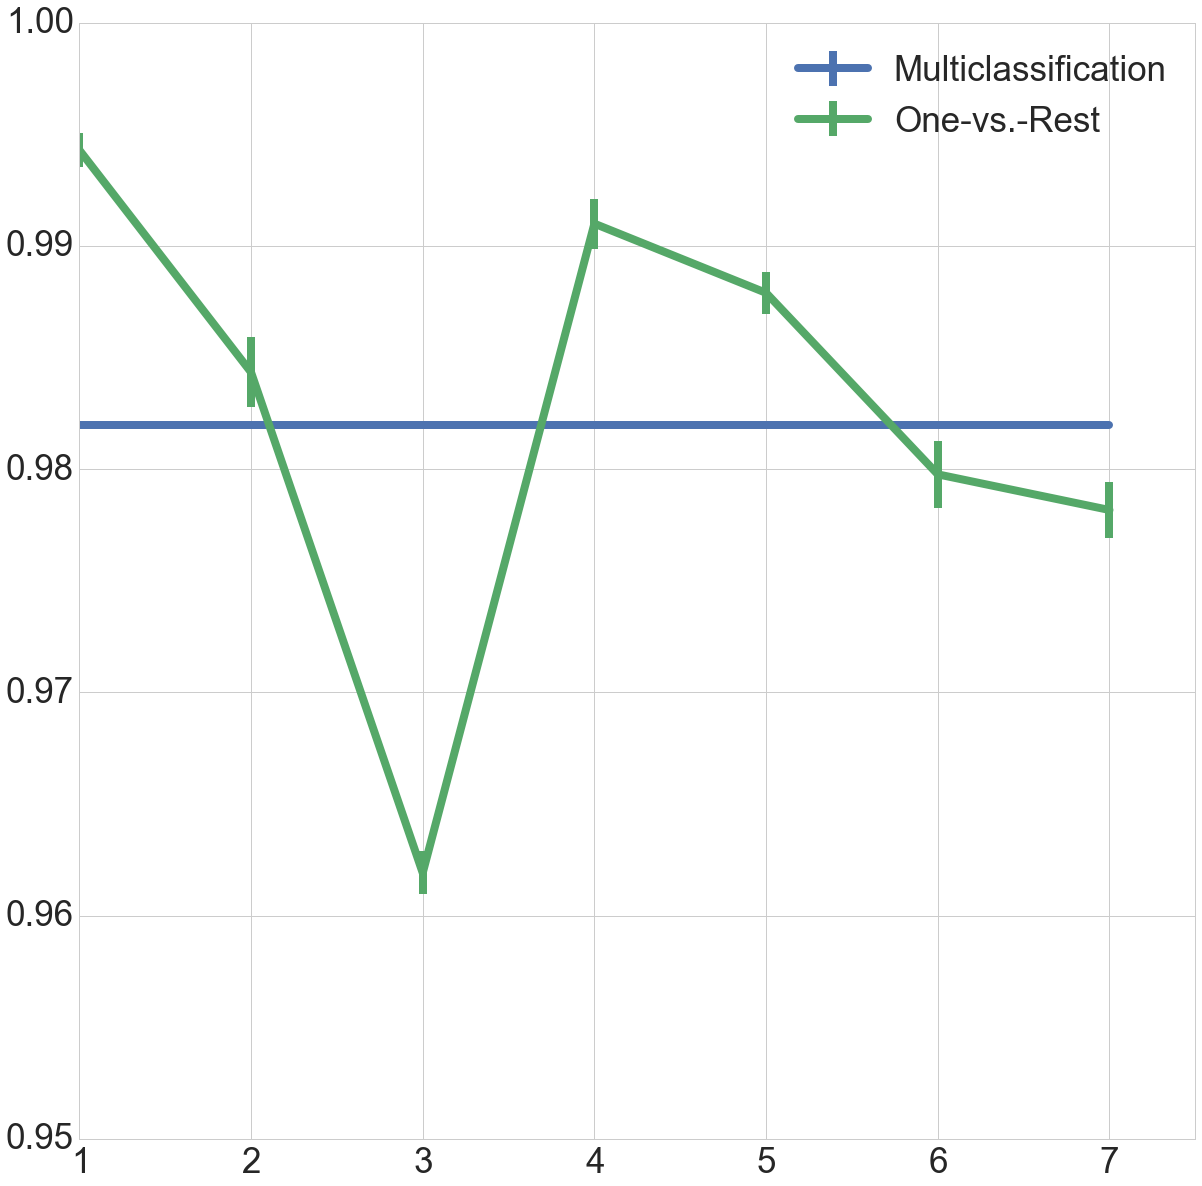

In [187]:
mean_val = np.ones((7,1))*0.982
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
rcParams['lines.linewidth'] =8
x= [1,2,3,4,5,6,7]
var = [0,0,0,0,0,0,0]
plt.errorbar(x,mean_val,var,label="Multiclassification")
plt.hold(True)

plt.errorbar(x,AvO_scores_chi_2,std_AvO_scores_chi_2,label= "One-vs.-Rest")
plt.legend()
plt.ylim(0.95,1.0)
plt.xlim(1,7.5)

In [184]:
best_knn_estimator={}
AvO_scores_chi_2_knn = []
std_AvO_scores_chi_2_knn = []
for idx in range(0,7):
    target_specie = mapper_species_categorical[idx+1]
    print("training All vs. One for species: " + target_specie)
    ytr = Y_train_OvA_list [idx];
    
    pipe = Pipeline([
    ('reduce_dim', SelectKBest()),
    ('classify', RandomForestClassifier())
    ])


    N_FEATURES_K = [10]
    N_ESTIMATORS = [2,3,4]
    MAX_FEATURES = [2,3,4]
    param_grid = [
    
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_K,
        'classify__n_estimators': N_ESTIMATORS,
        'classify__max_features': MAX_FEATURES
    },
    ]

    grid_Chi2 = GridSearchCV(pipe, cv=5, n_jobs=1, param_grid=param_grid,return_train_score=True,refit=True)
    grid_Chi2.fit(X_train, ytr)
    clf = grid_Chi2.best_estimator_
    best_estimator[target_specie] = clf
    list_rf_scores = []
    list_rf_train_scores = []
    list_rf_scores,list_rf_train_scores = get_scores(clf,100,list_rf_scores,list_rf_train_scores,"KNN completed",ytr)
    print(np.mean(list_rf_scores))
    print(np.mean(list_rf_train_scores))
    AvO_scores_chi_2_knn.append(np.mean(list_rf_scores))
    size = len(AvO_scores_chi_2_knn)
    std_AvO_scores_chi_2_knn.append(np.std(list_rf_scores)/size**0.5 * 0.5)


training All vs. One for species: Mammal
KNN completed
0.983711538462
0.998579385965
training All vs. One for species: Bird
KNN completed
0.9953
0.99805745614
training All vs. One for species: Reptile
KNN completed
0.92575
0.979568859649
training All vs. One for species: Fish
KNN completed
0.9974
0.999703947368
training All vs. One for species: Amphibian
KNN completed
0.969992307692
0.993010087719
training All vs. One for species: Bug
KNN completed
0.983303846154
0.996827192982
training All vs. One for species: Invertebrate
KNN completed
0.978141987179
0.987131556163


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


(0, 7.5)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


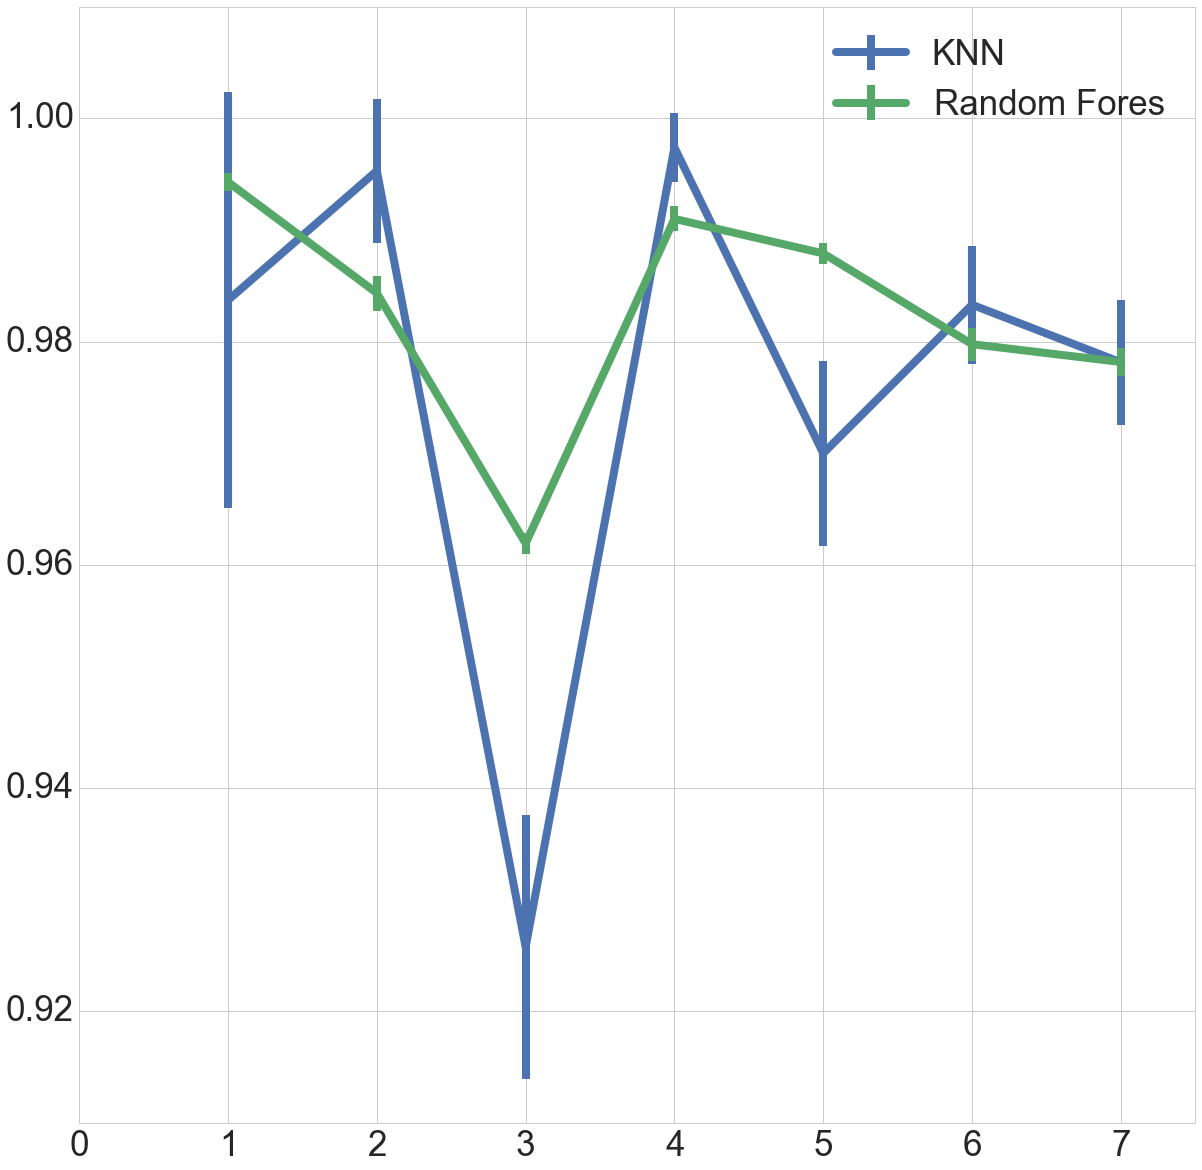

In [189]:

from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
rcParams['lines.linewidth'] =8
x= [1,2,3,4,5,6,7]
var = [0,0,0,0,0,0,0]
plt.errorbar(x,AvO_scores_chi_2_knn,std_AvO_scores_chi_2_knn,label="KNN")
plt.hold(True)

plt.errorbar(x,AvO_scores_chi_2,std_AvO_scores_chi_2,label= "Random Fores")
plt.legend()
plt.xlim(0,7.5)

(0.0, 1.0)

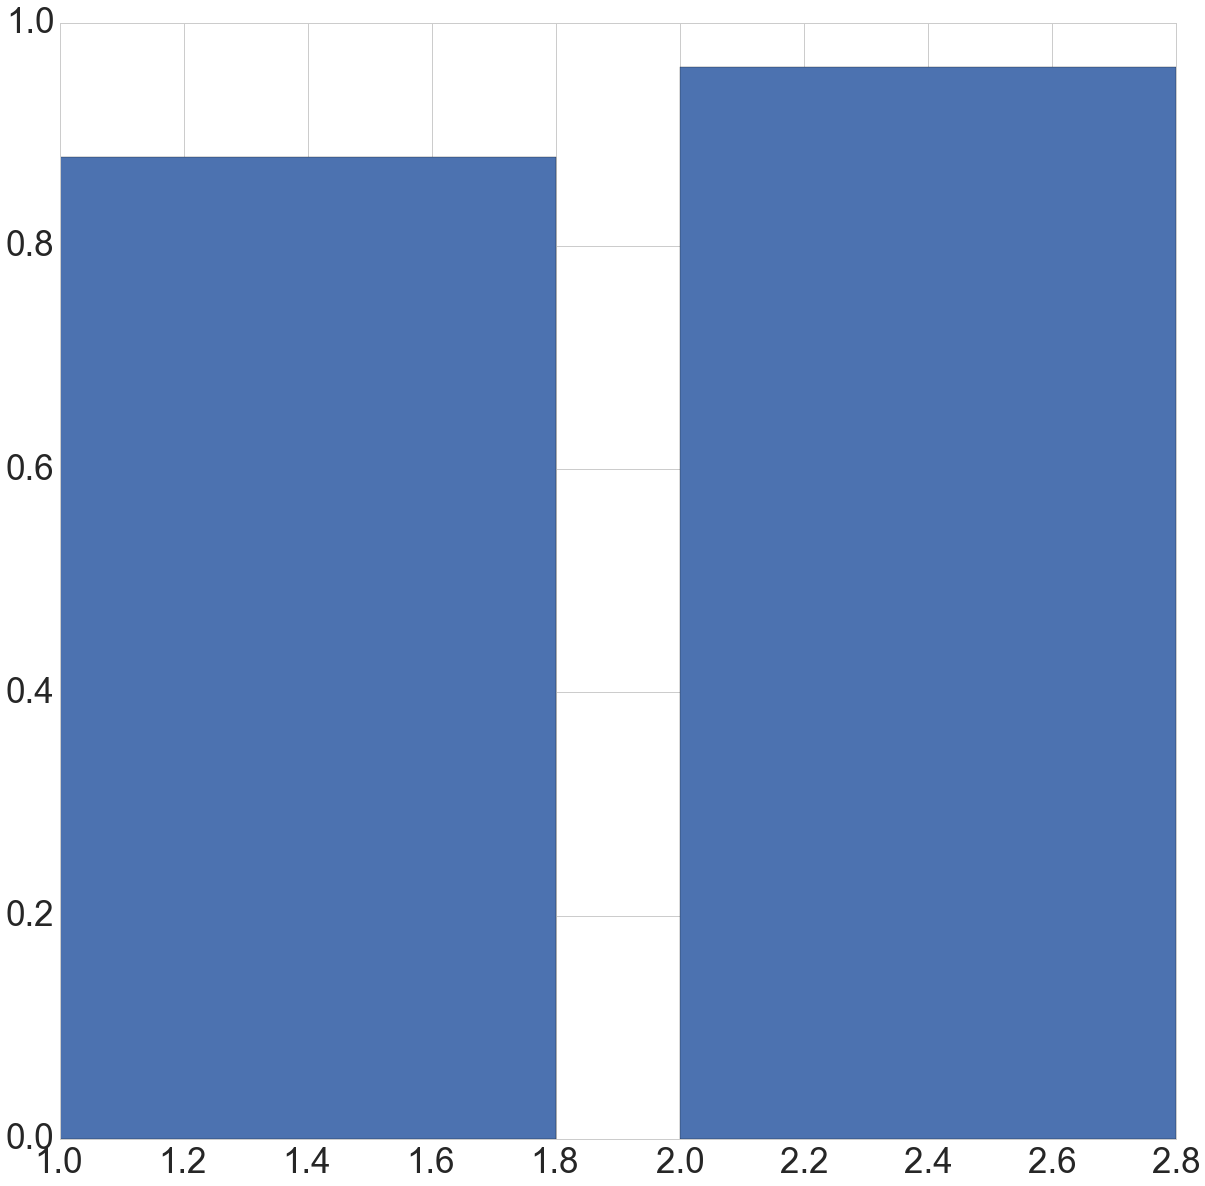

In [197]:
xx = [np.array([0.88]),np.array([0.96])]

fig, ax = plt.subplots()
ind = np.arange(1, 3)

# show the figure, but do not block



plt.bar(ind,xx)
plt.ylim(0.,1.0)
